In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import time
import sklearn
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from tabulate import tabulate

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier

evaluate={'Acc':"Accuracy", 'b_Acc':"Balanced Accuracy", 'F1':"F1 Score", 'kap':"Kappa", 'ROC':"Roc"}

In [3]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [4]:
def folder(f_name): #this function creates a folder named "attacks" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

In [5]:
def find_the_way(path,file_format,con=""):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                if con in file:
                    files_add.append(os.path.join(r, file))  
            
    return files_add

In [6]:


folder("results")
folder("pdfs")

In [7]:
attack_dict={'Active Wiretap':"AWT",
 'ARP MitM':"ARPMitM",
 'Fuzzing':"Fuzzing",
 'Mirai':"Mirai",
 'OS Scan':"OS_Scan",
 'SSDP Flood':"SSDP_F",
 'SSL Renegotiation':"SSL_Ren",
 'SYN DoS':"SYN_F",
 'Video Injection':"Vid_Inj"}

In [8]:
MiTM=["AWT","ARPMitM","Vid_Inj"]

In [16]:
color_list=['blue', 'orange', 'green', 'red', 'purple', 'brown',  'gray', 'olive', 'cyan']

ew_scores={"Active Wiretap":0.692609,
"ARP MitM":0.900157,
"Fuzzing":0.757167,
"Mirai":0.440265,
"OS Scan":0.861744,
"SSDP Flood":0.72464,
"SSL Renegotiation":0.570736,
"SYN DoS":0.826293,
"Video Injection":0.786375}
sns.set_style("whitegrid")

       SW  Dataset                 Acc     b_Acc      Prec       Rec        F1        kap       ROC      tra-T      test-T
---  ----  -----------------  --------  --------  --------  --------  --------  ---------  --------  ---------  ----------
107     2  Video Injection    0.825355  0.825355  0.838035  0.825355  0.823658   0.65071   0.825355  0.342183   0.00312548
106     2  SYN DoS            0.81741   0.731783  0.872764  0.731783  0.720688   0.49793   0.731783  0.0437392  0.00468795
105     2  SSL Renegotiation  0.59145   0.59145   0.598352  0.59145   0.584155   0.1829    0.59145   0.290609   0
104     2  SSDP Flood         0.82167   0.82167   0.851624  0.82167   0.818323   0.64334   0.82167   0.126556   0.00468805
 99     2  Active Wiretap     0.643345  0.643345  0.659657  0.643345  0.633196   0.28669   0.643345  0.396871   0.00312572
102     2  Mirai              0.82545   0.82545   0.862346  0.82545   0.820891   0.6509    0.82545   0.0296831  0.00156174
101     2  Fuzzing       

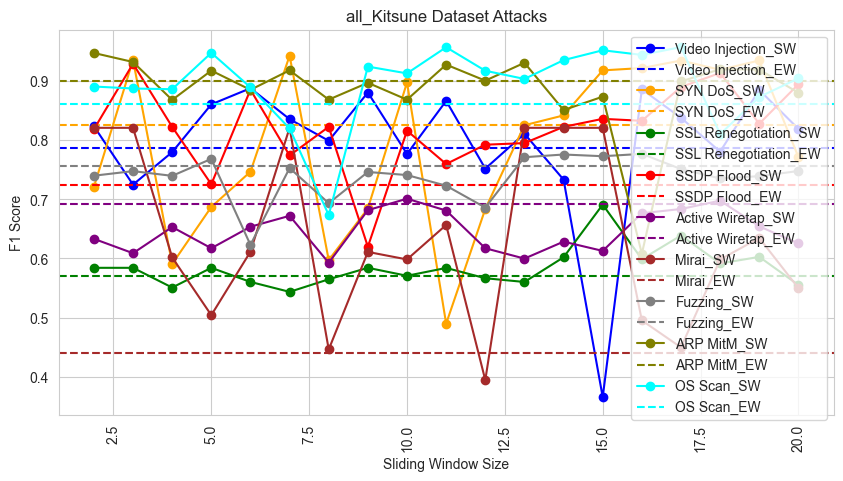

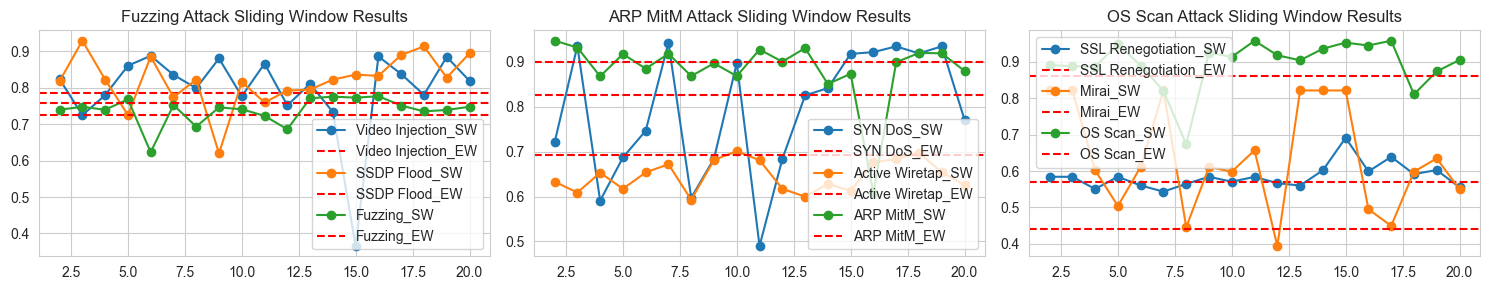

In [17]:
name_list=find_the_way('./results/','.csv')
lines=[["SW","Dataset","Acc","b_Acc","Prec","Rec","F1","kap","ROC","tra-T","test-T"]]
cols=['Acc', 'b_Acc', 'Prec', 'Rec', 'F1','kap', 'ROC', 'tra-T', 'test-T']
for p in name_list:
    df = pd.read_csv(p,usecols=cols) 
    temp=pd.DataFrame(df.mean())
    a=list(temp.values.flatten())
    add_data=p[:-4].split("_")[1:]
    add_data=[int(add_data[0]),add_data[1]]
    add_data=add_data+a
    lines.append(add_data)
results = pd.DataFrame (lines[1:], columns = lines[0])
results=results.sort_values('SW')

print (tabulate(results, headers=list(results.columns)))
my_xticks=list(range(2,21))
for j in ['F1']:#['Acc', 'b_Acc',  'F1', 'kap', 'ROC']:
    plt.figure(figsize=(10,5))
    graph_name=f"all_Kitsune Dataset Attacks"
    plt.title(graph_name)
    plt.ylabel(evaluate[j])
    plt.xlabel("Sliding Window Size")
    for pp,p in enumerate(results["Dataset"].unique()):
        df=results[results["Dataset"]==p]


        plt.plot(my_xticks,df[j], linestyle='-', marker='o',label= f"{p}_SW",color=color_list[pp])
        plt.axhline(ew_scores[p], linestyle='--'   , color=color_list[pp], label= f"{p}_EW")## hepsi

    plt.legend(numpoints=1)
    plt.xticks(rotation=90) 
    graph_name=f"./pdfs/all_Kitsune Dataset-{j} AttackEW-mitm.pdf"
    plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()
my_xticks=list(range(2,21))
for j in ['F1']:#['Acc', 'b_Acc',  'F1', 'kap', 'ROC']:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
    for pp,p in enumerate(results["Dataset"].unique()):
        df=results[results["Dataset"]==p]
        axes[pp%3].plot(my_xticks,df[j], linestyle='-', marker='o',label= f"{p}_SW")
        axes[pp%3].axhline(ew_scores[p], linestyle='--'   , color="r", label= f"{p}_EW")## hepsi
        axes[pp%3].title.set_text(f'{p} Attack Sliding Window Results')
        axes[pp%3].legend()
    fig.tight_layout()
    graph_name=f"./pdfs/ind_Kitsune Dataset-{j} Attack_EW.pdf"
    fig.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()

       SW  Dataset                 Acc     b_Acc      Prec       Rec        F1        kap       ROC      tra-T      test-T
---  ----  -----------------  --------  --------  --------  --------  --------  ---------  --------  ---------  ----------
107     2  Video Injection    0.825355  0.825355  0.838035  0.825355  0.823658   0.65071   0.825355  0.342183   0.00312548
106     2  SYN DoS            0.81741   0.731783  0.872764  0.731783  0.720688   0.49793   0.731783  0.0437392  0.00468795
105     2  SSL Renegotiation  0.59145   0.59145   0.598352  0.59145   0.584155   0.1829    0.59145   0.290609   0
104     2  SSDP Flood         0.82167   0.82167   0.851624  0.82167   0.818323   0.64334   0.82167   0.126556   0.00468805
 99     2  Active Wiretap     0.643345  0.643345  0.659657  0.643345  0.633196   0.28669   0.643345  0.396871   0.00312572
102     2  Mirai              0.82545   0.82545   0.862346  0.82545   0.820891   0.6509    0.82545   0.0296831  0.00156174
101     2  Fuzzing       

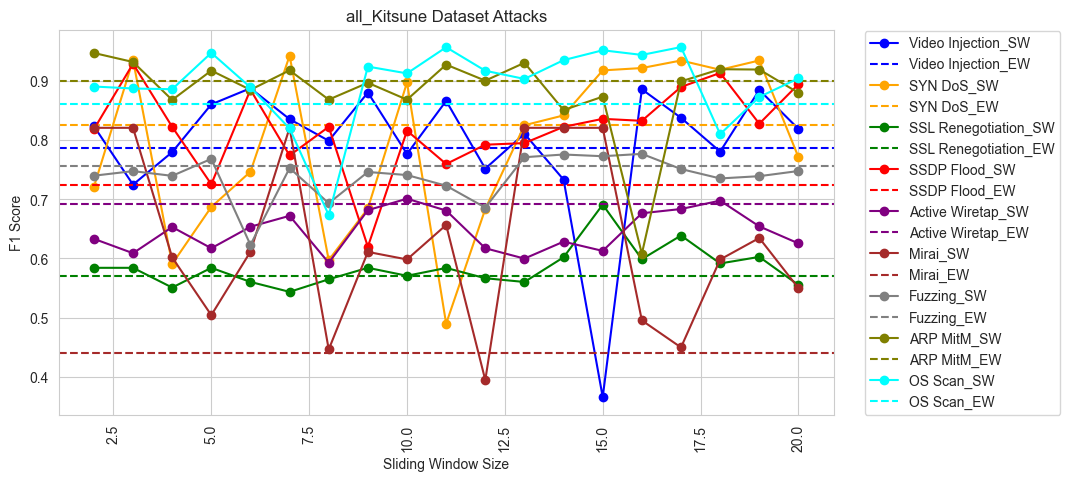

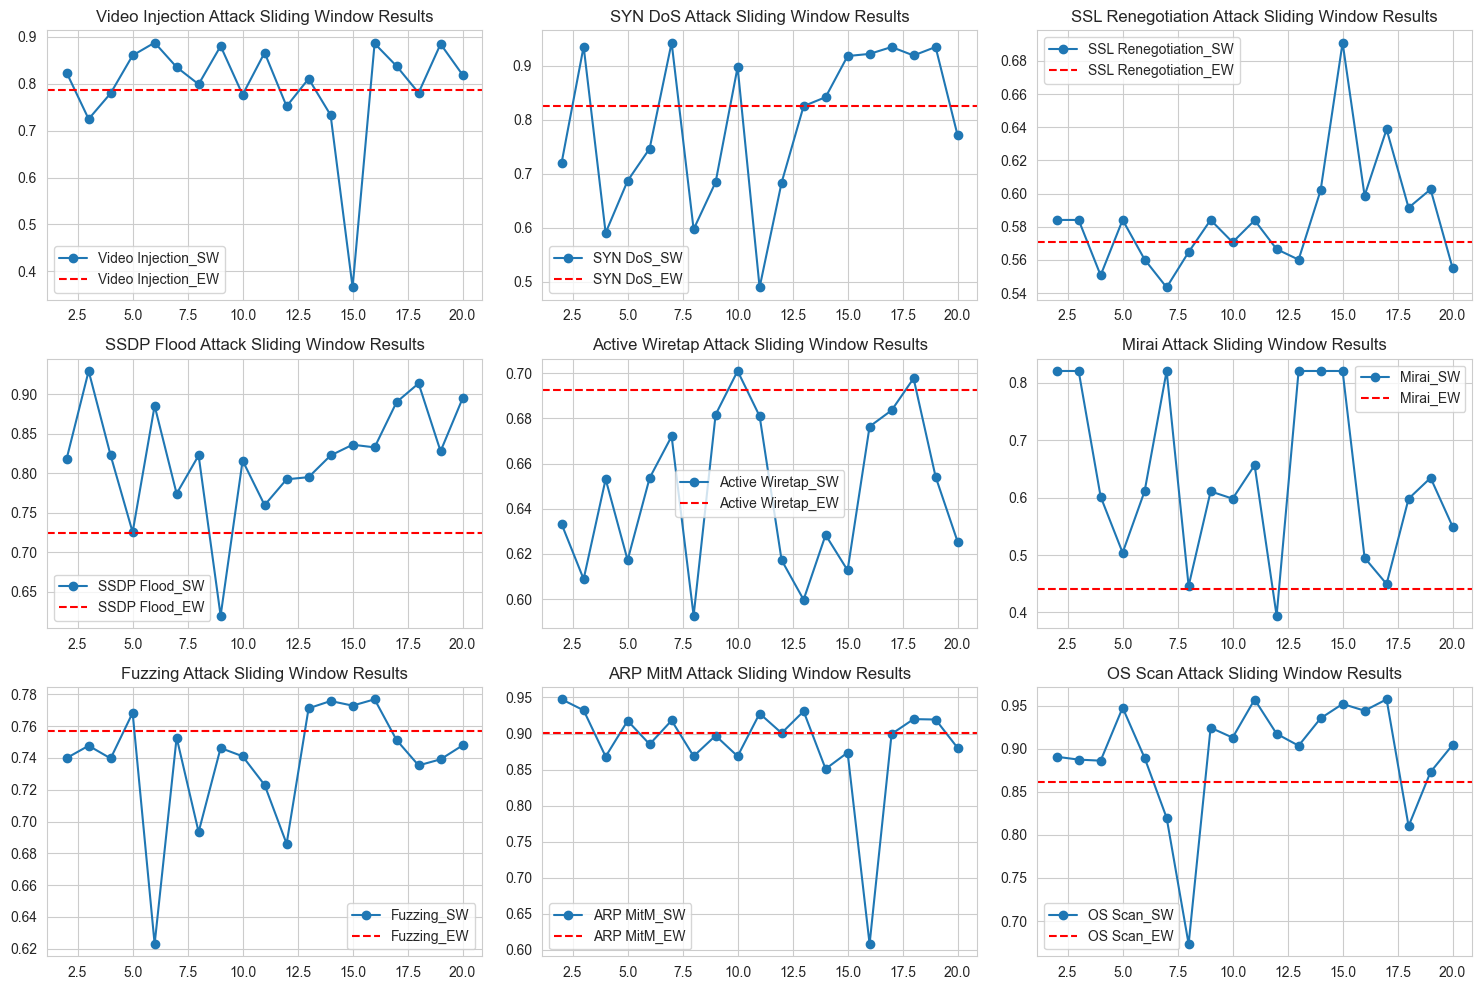

In [18]:
name_list=find_the_way('./results/','.csv')
lines=[["SW","Dataset","Acc","b_Acc","Prec","Rec","F1","kap","ROC","tra-T","test-T"]]
cols=['Acc', 'b_Acc', 'Prec', 'Rec', 'F1','kap', 'ROC', 'tra-T', 'test-T']
for p in name_list:
    df = pd.read_csv(p,usecols=cols) 
    temp=pd.DataFrame(df.mean())
    a=list(temp.values.flatten())
    add_data=p[:-4].split("_")[1:]
    add_data=[int(add_data[0]),add_data[1]]
    add_data=add_data+a
    lines.append(add_data)
results = pd.DataFrame (lines[1:], columns = lines[0])
results=results.sort_values('SW')

print (tabulate(results, headers=list(results.columns)))
my_xticks=list(range(2,21))
for j in ['F1']:#['Acc', 'b_Acc',  'F1', 'kap', 'ROC']:
    plt.figure(figsize=(10,5))
    graph_name=f"all_Kitsune Dataset Attacks"
    plt.title(graph_name)
    plt.ylabel(evaluate[j])
    plt.xlabel("Sliding Window Size")
    for pp,p in enumerate(results["Dataset"].unique()):
        df=results[results["Dataset"]==p]


        plt.plot(my_xticks,df[j], linestyle='-', marker='o',label= f"{p}_SW",color=color_list[pp])
        plt.axhline(ew_scores[p], linestyle='--'   , color=color_list[pp], label= f"{p}_EW")## hepsi

    #plt.legend(loc=1)
    plt.legend(loc=(1.04, 0))
    plt.xticks(rotation=90) 
    graph_name=f"./pdfs/all_Kitsune Dataset-{j} AttackEW-all.pdf"
    plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()
my_xticks=list(range(2,21))
for j in ['F1']:#['Acc', 'b_Acc',  'F1', 'kap', 'ROC']:
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
    for pp,p in enumerate(results["Dataset"].unique()):
        df=results[results["Dataset"]==p]
        axes[pp//3,pp%3].plot(my_xticks,df[j], linestyle='-', marker='o',label= f"{p}_SW")
        axes[pp//3,pp%3].axhline(ew_scores[p], linestyle='--'   , color="r", label= f"{p}_EW")## hepsi
        axes[pp//3,pp%3].title.set_text(f'{p} Attack Sliding Window Results')
        axes[pp//3,pp%3].legend()
    fig.tight_layout()
    graph_name=f"./pdfs/ind_Kitsune Dataset-{j} Attack_all_EW.pdf"
    fig.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()

      SW  Dataset               Acc     b_Acc      Prec       Rec        F1       kap       ROC      tra-T       test-T
--  ----  ---------------  --------  --------  --------  --------  --------  --------  --------  ---------  -----------
20     2  Video Injection  0.51186   0.51186   0.511862  0.51186   0.511841   0.02372  0.51186   0.186206   0.00435209
19     2  ARP MitM         0.507555  0.507555  0.50756   0.507555  0.50748    0.01511  0.507555  0.147002   0.00369897
18     2  Active Wiretap   0.531855  0.531855  0.531861  0.531855  0.531835   0.06371  0.531855  0.105089   0.00418489
23     3  Video Injection  0.51029   0.51029   0.51029   0.51029   0.510286   0.02058  0.51029   0.181816   0.00366292
22     3  ARP MitM         0.50025   0.50025   0.50025   0.50025   0.500231   0.0005   0.50025   0.122963   0.0035013
21     3  Active Wiretap   0.53056   0.53056   0.530561  0.53056   0.530558   0.06112  0.53056   0.132256   0.0039181
26     4  Video Injection  0.507705  0.507705  0

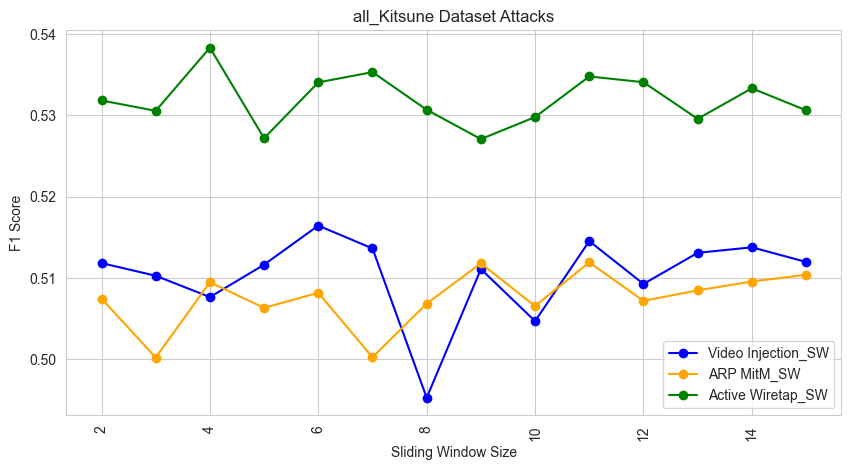

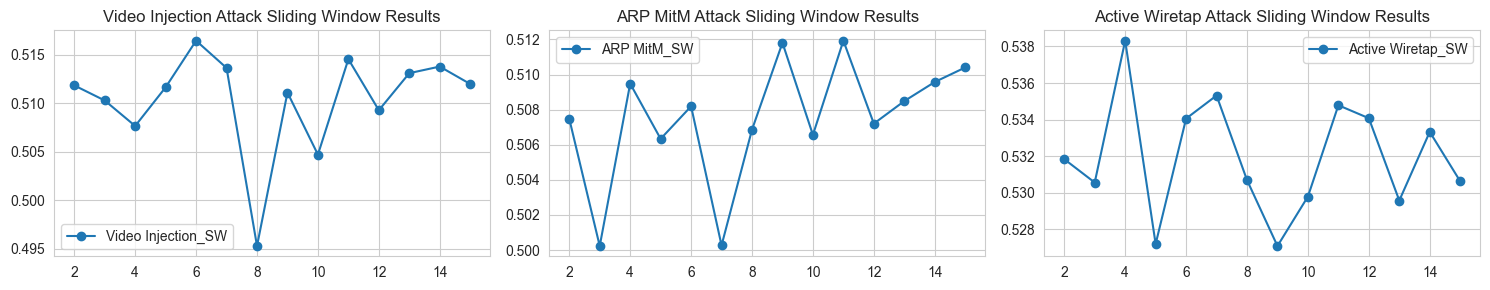

In [33]:
name_list=find_the_way('./results/','.csv')
lines=[["SW","Dataset","Acc","b_Acc","Prec","Rec","F1","kap","ROC","tra-T","test-T"]]
cols=['Acc', 'b_Acc', 'Prec', 'Rec', 'F1','kap', 'ROC', 'tra-T', 'test-T']
for p in name_list:
    df = pd.read_csv(p,usecols=cols) 
    temp=pd.DataFrame(df.mean())
    a=list(temp.values.flatten())
    add_data=p[:-4].split("_")[1:]
    add_data=[int(add_data[0]),add_data[1]]
    add_data=add_data+a
    lines.append(add_data)
results = pd.DataFrame (lines[1:], columns = lines[0])
results=results.sort_values('SW')

print (tabulate(results, headers=list(results.columns)))
my_xticks=list(range(2,16))
for j in ['F1']:#['Acc', 'b_Acc',  'F1', 'kap', 'ROC']:
    plt.figure(figsize=(10,5))
    graph_name=f"all_Kitsune Dataset Attacks"
    plt.title(graph_name)
    plt.ylabel(evaluate[j])
    plt.xlabel("Sliding Window Size")
    for pp,p in enumerate(results["Dataset"].unique()):
        df=results[results["Dataset"]==p]


        plt.plot(my_xticks,df[j], linestyle='-', marker='o',label= f"{p}_SW",color=color_list[pp])
        #plt.axhline(ew_scores[p], linestyle='--'   , color=color_list[pp], label= f"{p}_EW")## hepsi

    plt.legend(numpoints=1)
    plt.xticks(rotation=90) 
    graph_name=f"./pdfs/all_Kitsune Dataset-{j} Attack-mitm.pdf"
    plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()
my_xticks=list(range(2,16))
for j in ['F1']:#['Acc', 'b_Acc',  'F1', 'kap', 'ROC']:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
    for pp,p in enumerate(results["Dataset"].unique()):
        df=results[results["Dataset"]==p]
        axes[pp%3].plot(my_xticks,df[j], linestyle='-', marker='o',label= f"{p}_SW")
        #axes[pp%3].axhline(ew_scores[p], linestyle='--'   , color="r", label= f"{p}_EW")## hepsi
        axes[pp%3].title.set_text(f'{p} Attack Sliding Window Results')
        axes[pp%3].legend()
    fig.tight_layout()
    graph_name=f"./pdfs/ind_Kitsune Dataset-{j} Attack_mitm.pdf"
    fig.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()

# ALL ATTACKS

In [16]:
for i in tqdm(range(2,21)):
    print(f"{45*'#'} {i} {45*'#'}\n")
    file_list=find_the_way("SW",f"last_{i}_","train")
    for ii in (file_list):
        temp=ii.split("_")[2]
        output_csv=f"./results/ML_{i}_{temp}.csv"
        target_names=["attack","benign"]
        dname=attack_dict[temp]  
        if dname not in MiTM:
            feature,_=GA(ii,ii.replace("train","test"),features,gen_number=25,outputcsv=f"{i}_{dname}_GA_output.csv")
            print(f"{dname} : {feature}\n\n")
            ML_CV(ii,ii.replace("train","test"),output_csv,feature,dname,i)   



  0%|                                                                                           | 0/19 [00:00<?, ?it/s]

############################################# 2 #############################################

Fuzzing : ['ts', 'payload_bytes', 'entropy', 'pck_size_diff', 'pck_size_mean', 'ts_diff', 'ts_mean', 'TCP_window_std', 'payload_bytes_diff', 'payload_bytes_mean', 'payload_bytes_std', 'entropy_mean', 'entropy_std', 'Label']




  0%|                                                                                           | 0/19 [01:06<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
name_list=find_the_way('./results/','.csv')
lines=[["SW","Dataset","Acc","b_Acc","Prec","Rec","F1","kap","ROC","tra-T","test-T"]]
cols=['Acc', 'b_Acc', 'Prec', 'Rec', 'F1','kap', 'ROC', 'tra-T', 'test-T']
for p in name_list:
    df = pd.read_csv(p,usecols=cols) 
    temp=pd.DataFrame(df.mean())
    a=list(temp.values.flatten())
    add_data=p[:-4].split("_")[1:]
    add_data=[int(add_data[0]),add_data[1]]
    add_data=add_data+a
    lines.append(add_data)
results = pd.DataFrame (lines[1:], columns = lines[0])
results=results.sort_values('SW')

print (tabulate(results, headers=list(results.columns)))
my_xticks=list(range(2,21))
for j in ['F1']:#['Acc', 'b_Acc',  'F1', 'kap', 'ROC']:
    plt.figure(figsize=(10,5))
    graph_name=f"all_Kitsune Dataset Attacks"
    plt.title(graph_name)
    plt.ylabel(evaluate[j])
    plt.xlabel("Sliding Window Size")
    for p in results["Dataset"].unique():
        df=results[results["Dataset"]==p]


        plt.plot(my_xticks,df[j], linestyle='-', marker='o',label= p)


    plt.legend(numpoints=1)
    plt.xticks(rotation=90) 
    graph_name=f"./pdfs/all_Kitsune Dataset-{j} Attack-mitm.pdf"
    plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()
my_xticks=list(range(2,21))
for j in ['F1']:#['Acc', 'b_Acc',  'F1', 'kap', 'ROC']:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
    for pp,p in enumerate(results["Dataset"].unique()):
        df=results[results["Dataset"]==p]
        axes[pp%3].plot(my_xticks,df[j], linestyle='-', marker='o',label= p)
        axes[pp%3].title.set_text(f'{p} Attack Sliding Window Results')
        axes[pp%3].legend()
    fig.tight_layout()
    graph_name=f"./pdfs/ind_Kitsune Dataset-{j} Attack_mitm.pdf"
    fig.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()

In [ ]:
mavi
turuncu
koyu yesil
kirmizi
mor
kahve
pembe
gri
acik yesil


In [16]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

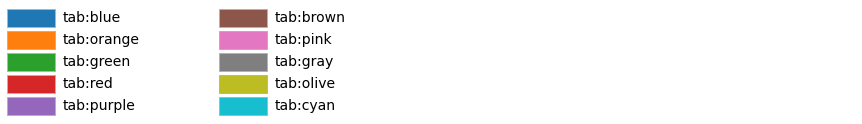

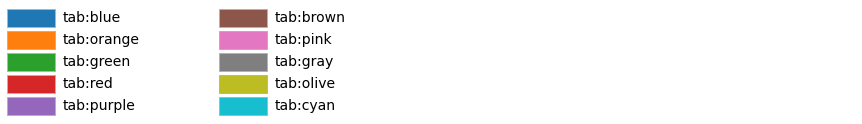

In [17]:
plot_colortable(mcolors.TABLEAU_COLORS, sort_colors=False, emptycols=2)

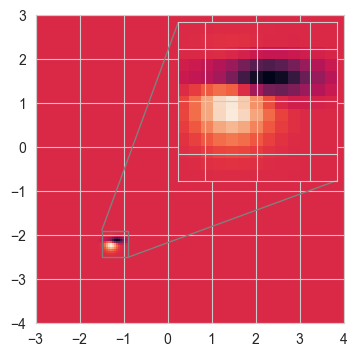

In [35]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import numpy as np

def get_demo_image():
    from matplotlib.cbook import get_sample_data
    import numpy as np
    f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
    z = np.load(f)
    # z is a numpy array of 15x15
    return z, (-3,4,-4,3)

fig, ax = plt.subplots(figsize=[5,4])

# prepare the demo image
Z, extent = get_demo_image()
Z2 = np.zeros([150, 150], dtype="d")
ny, nx = Z.shape
Z2[30:30+ny, 30:30+nx] = Z

# extent = [-3, 4, -4, 3]
ax.imshow(Z2, extent=extent, interpolation="nearest",
          origin="lower")

axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
axins.imshow(Z2, extent=extent, interpolation="nearest",
             origin="lower")

# sub region of the original image
x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

plt.xticks(visible=False)
plt.yticks(visible=False)

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.draw()

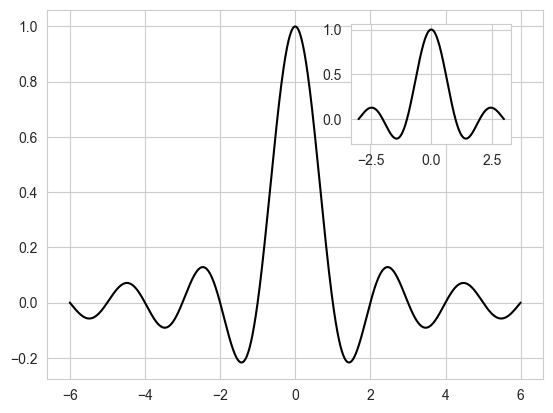

In [37]:


import numpy as np
from matplotlib import pyplot as plt

# Generate the main data
X = np.linspace(-6, 6, 1024)
Y = np.sinc(X)

# Generate data for the zoomed portion
X_detail = np.linspace(-3, 3, 1024)
Y_detail = np.sinc(X_detail)

# plot the main figure
plt.plot(X, Y, c = 'k')  

 # location for the zoomed portion 
sub_axes = plt.axes([.6, .6, .25, .25]) 

# plot the zoomed portion
sub_axes.plot(X_detail, Y_detail, c = 'k') 

# insert the zoomed figure
# plt.setp(sub_axes)

plt.show()